# Cloning the ML Course repository from GV-Americas

**!git clone** downloads the repository with all notebooks and files inside it and creates a copy in the current directory.

**!%cd** allows you to import modules within it: **plotting_gv**!

In [ ]:
!git clone https://github.com/gv-americas/ml_course_americas.git

import sys

sys.path.append('/content/ml_course_americas')

Cloning into 'ml_course_americas'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 81 (delta 46), reused 39 (delta 23), pack-reused 0
Unpacking objects: 100% (81/81), 4.47 MiB | 1018.00 KiB/s, done.


## Importing four libraries:

**Pandas**: used for data manipulation and analysis.

**Numpy**: used for scientific computing and working with arrays.

**Matplotlib**: used for data visualization and creating plots.

**Plotting_gv**: a custom plotting library created by GV Americas, which contains additional plotting functions and custom styles.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotting_gv as gv

# Upload data clustered with Google Colab files

In [ ]:
from google.colab import files

uploaded = files.upload()    # 

filename = list(uploaded.keys())[0]   #

Saving phosphate_assay_sampled_geomet_clustered.csv to phosphate_assay_sampled_geomet_clustered.csv


# Reading data with Pandas

In [ ]:
data = pd.read_csv(filename)

#data.head(5)
data.columns

Index(['Unnamed: 0', 'Name', 'X', 'Y', 'Z', 'Depth From', 'Depth To', 'Length',
       'AL2O3', 'ALT', 'BAO', 'CAO', 'Consumo_coletor_(g/t)', 'FE2O3',
       'MASSA_T', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2', 'kmeans_5k',
       'aggl_5k', 'kmeans_2k', 'aggl_2k', 'kmeans_3k', 'aggl_3k', 'kmeans_4k',
       'aggl_4k', 'kmeans_6k', 'aggl_6k'],
      dtype='object')

# Data preprocessing analysis: cleaning and processing

# Clean dataframe with dataframe.dropna()

In [ ]:
data0 = data.dropna()

# Declaring variables to filter data

In [ ]:
coords = ['X', 'Y', 'Z']

cat_var = ['ALT']

variables =  ['AL2O3', 'BAO', 'CAO', 'FE2O3', 'MGO', 'NB2O5', 'P2O5', 'SIO2', 'TIO2']

clusters = ['aggl_5k','kmeans_3k', 'aggl_3k', 'kmeans_4k', 'aggl_4k', 'kmeans_5k', 'kmeans_2k', 'aggl_2k', 'kmeans_6k', 'aggl_6k']

# Define the target to be supervised!

In [ ]:
target = 'kmeans_5k'

# Splitting features (X) and target (y)

In [ ]:
X = data0[variables].values #declarando as variáveis ou features
y = data0[target].values # declarando qual será a classe alvo do modelo

# Counting target categories

In [ ]:
data['kmeans_5k'].value_counts()

1.0    1147
3.0     957
4.0     710
2.0     597
0.0     184
Name: kmeans_5k, dtype: int64

# Features samples size

In [ ]:
len(X)

3595

# Split train, test samples with sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, # X features, independent variables
    y, # y target, dependet variable
    test_size=0.3, #fração de treino e teste
    shuffle=True, #embaralha os dados: evita que a divisão dos dados fique tendenciosa a uma classe "pra nao ficar na mesma ordem"
    random_state=100, #semente aleatória: garante a repoducibilidade dos resultados, ou seja, a divisão dos dados será sempre a mesma
    stratify=y) #separa treino e teste com a mesma proporção ## muito bom, explicar!


# Train size

In [ ]:
print('Fração de treino:')
len(X_train)

Fração de treino:


2516

# Test size

In [ ]:
print('Fração de validação:')
len(X_test)

Fração de validação:


1079

# Data transformation: StandardScaler() using Sklearn.preprocessing

z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the samples.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


**Note: The transformation will be applied only on X/features!**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# só precisamos transformar o X, ou seja, as features onde serão treinados e validados os modelos
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Training models

## KNN Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier    

In [ ]:
nn = 50 #número de vizinhos


knn = KNeighborsClassifier(
    n_neighbors=nn, #numero de vizinhos a ser considerados
    weights='distance', #como ele vai ponderar a proximidade das amostras (pesos), nesse caso distancia euclidiana
    p=2 #p=2 usa a distância euclidiana, weights é como ele calcula os pesos para os vizinhos
    ) 

knn.fit(X_train, y_train) #aplicando o modelo nos dados de treino

y_pred = knn.predict(X_test) #prevendo os valores a partir do modelo nos dados de teste



# Validating KNN model with confusion matrix and classification report


              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51        50
         1.0       0.97      0.98      0.97       339
         2.0       0.93      0.99      0.96       220
         3.0       0.96      0.99      0.98       289
         4.0       0.90      0.94      0.92       181

    accuracy                           0.95      1079
   macro avg       0.95      0.85      0.87      1079
weighted avg       0.95      0.95      0.94      1079



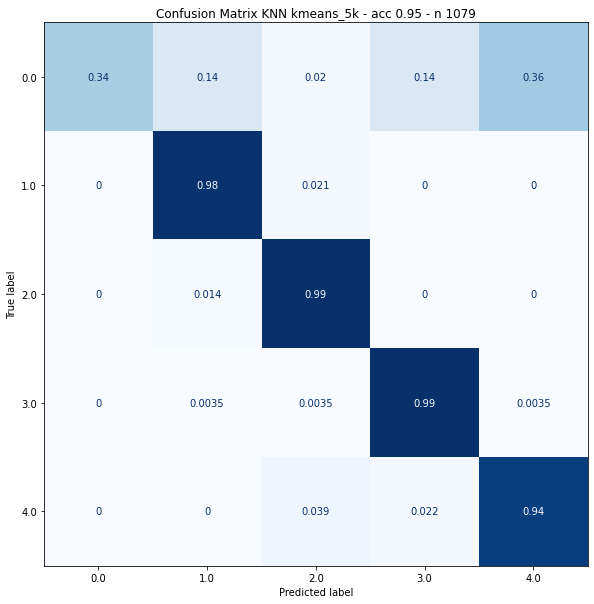

In [ ]:
gv.confusion_matrix_plot(knn, y_test, y_pred, f'Confusion Matrix KNN {target}', report=True )

## SVM

https://scikit-learn.org/stable/modules/svm.html

## Linear and RBF SVC: support vector classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(
kernel='linear', #kernel a ser usado para a construção dos hiperplanos..
C=1, #penaliza os pontos que estão do lado errado do hiperplano, quanto maior C mais pontos sao penalizados, ou mais rigoroso.
#gamma='scale', #habilitar se o kernel for rbf!
class_weight='balanced', # calcula automaticamente os balanços entre as classes (pode passar manualmente em dicionário)
random_state=100, #reproducibilidade dos resultados
probability=True) #retorna as probabilidades de cada classe

svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

# Validating SVM model with confusion matrix and classification report


              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        50
         1.0       1.00      0.96      0.98       339
         2.0       0.94      1.00      0.97       220
         3.0       0.99      0.99      0.99       289
         4.0       1.00      0.95      0.97       181

    accuracy                           0.98      1079
   macro avg       0.96      0.98      0.97      1079
weighted avg       0.98      0.98      0.98      1079



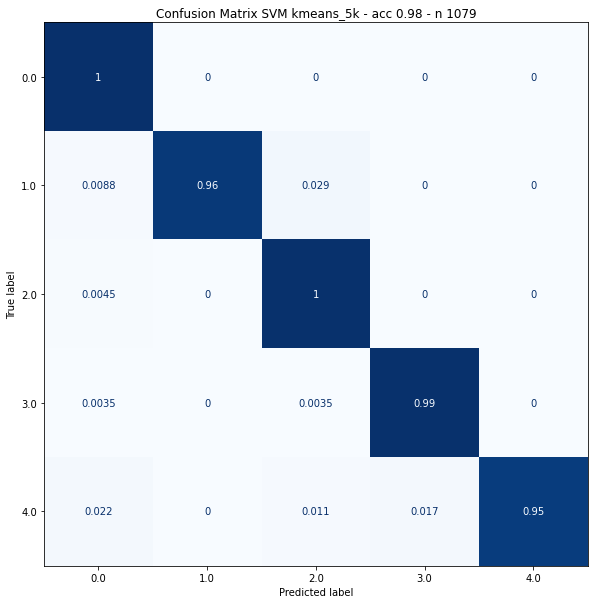

In [ ]:
gv.confusion_matrix_plot(svm, y_test, y_pred, f'Confusion Matrix SVM {target}', report=True)

## Decision Trees

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(
random_state=100,
criterion='gini',
max_depth=8,
min_samples_split=100
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


# Validating Decision Trees model with confusion matrix and classification report


              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        50
         1.0       0.95      0.92      0.94       339
         2.0       0.87      0.88      0.88       220
         3.0       0.97      0.98      0.97       289
         4.0       0.88      0.95      0.91       181

    accuracy                           0.92      1079
   macro avg       0.90      0.88      0.89      1079
weighted avg       0.92      0.92      0.92      1079



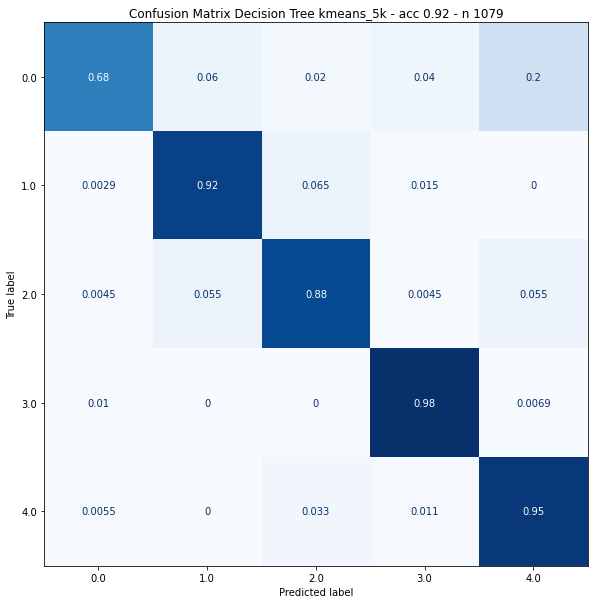

In [ ]:
gv.confusion_matrix_plot(tree, y_test, y_pred, f'Confusion Matrix Decision Tree {target}', report=True )


## Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
n_estimators=300,
max_depth=8,
min_samples_split=5,
random_state=100,
)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

# Validating Random Forest model with confusion matrix and classification report


              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84        50
         1.0       0.98      0.98      0.98       339
         2.0       0.94      0.97      0.96       220
         3.0       0.98      0.99      0.99       289
         4.0       0.96      0.95      0.95       181

    accuracy                           0.97      1079
   macro avg       0.96      0.93      0.94      1079
weighted avg       0.97      0.97      0.97      1079



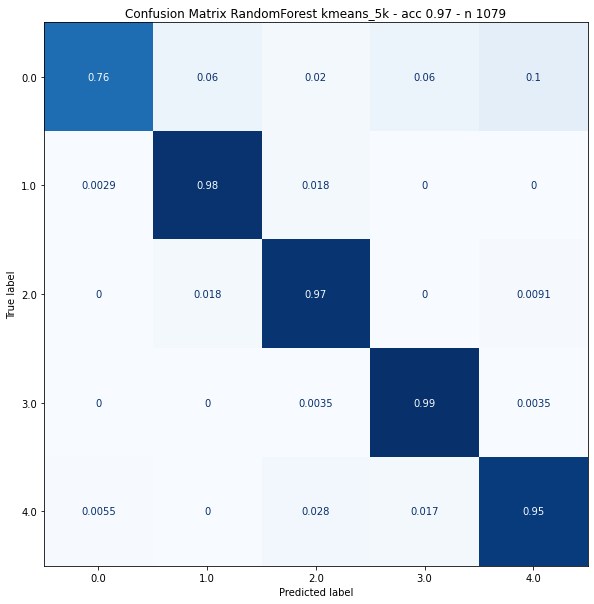

In [ ]:
gv.confusion_matrix_plot(rf, y_test, y_pred, f'Confusion Matrix RandomForest {target}', report=True )


# Which input features are most important in predicting the target variable for Random Forest Model

Note: Feature importance provides a way to identify which features have the most predictive power for a given target variable, and can be useful for optimizing model performance or gaining insights into the relationships between features and the target variable.

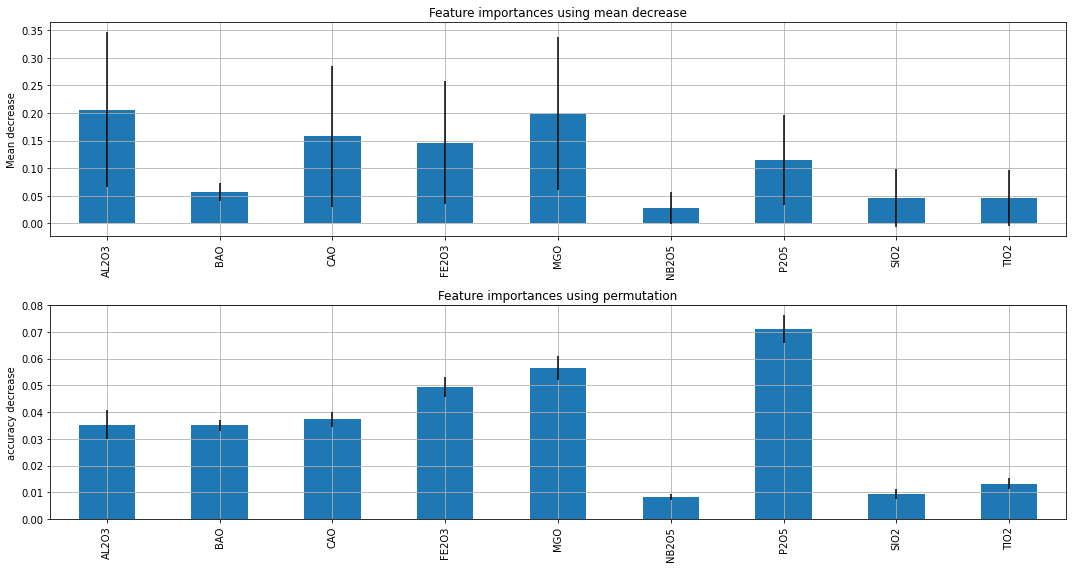

In [ ]:
gv.features_importance(rf, X_test, variables, y_test, clf=True)

# Model evaluation with K-Folds

The purpose of this plot is to visualize the performance of a model when evaluated with a k-fold cross-validation strategy.

The x-axis represents the different folds used in the cross-validation (1 to k), while the y-axis represents the performance metric chosen to evaluate the model.

Each box in the plot represents the distribution of scores obtained for the corresponding fold. 

This plot can help to understand the variability of the model's performance across different folds, and whether the model is overfitting or underfitting.

If the performance is consistent across all folds, the model is likely to generalize well to new data. 

If the performance is highly variable, the model may need to be improved or re-evaluated with a different strategy.

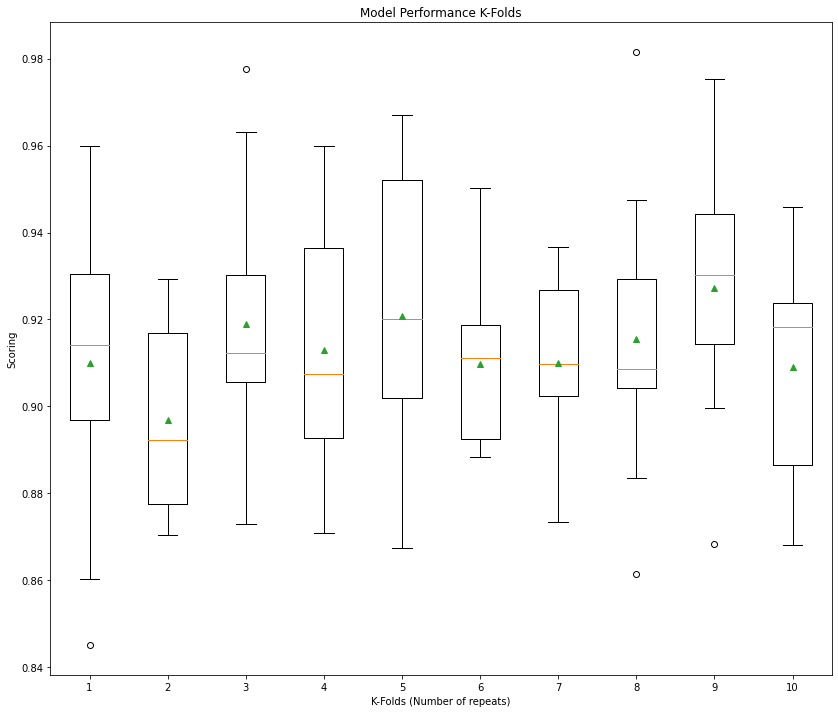

In [ ]:
gv.evaluate_kfolds(X_train, y_train, 10, 5, rf, classcore='balanced accuracy')

# Practice

In this exercise, you will reproduce the supervised learning process presented in the notebook, but with a new set of variables!

Perform a statistical analysis of the data using a scatter matrix and a correlation matrix to understand the distributions and their correlations.

In [ ]:
## code

In [ ]:
## code

Define your features to be used for training the model and your target variable. 

Note: try not to use the same target variable as the one used in the group exercise to obtain different tests.

In [ ]:
## code

Count the categories of the target variable.

In [ ]:
## code

Split the train and test sets after the discussions made based on your analysis.

Train, test set split!

In [ ]:
## code

Preprocess the data by applying standardization with **StandardScaler()**.

Remember... only for your features! 

And... don't forget to apply it to your test and train variables.


In [ ]:
## code

Choose one of the algorithms worked on and explained, and train your model, then perform its validations! 

Remember... training the model is done only on your training data, while the validations are performed on the test data!


In [ ]:
## code

Plot a confusion matrix and the respective classification report of your model with **gv.confusion_matrix_plot()**.

In [ ]:
## code

If there is time and interest, understand the importance of the variables used in the model with **gv.feature_importance()** and perform a cross-validation by k-folds using **gv.evalute_kfolds()** to understand the performance of your model and if it has a biased modeling.





In [ ]:
## code